<a href="https://colab.research.google.com/github/naoya1110/covid19-japan-7days-average/blob/main/covid19_jpn_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import os
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np

In [2]:
os.system("apt install subversion")
os.system("svn export https://github.com/CSSEGISandData/COVID-19/trunk/csse_covid_19_data/csse_covid_19_daily_reports")

0

In [82]:
DATA = "csse_covid_19_daily_reports"
filenames = sorted(os.listdir(DATA))

date_list = []

for filename in filenames:
    if ".csv" in filename:
        date_list.append(datetime.strptime(filename, '%m-%d-%Y.csv'))

date_list = sorted(date_list)
print(len(date_list))

598


In [83]:
pref_dict = {
            'Aichi': 74.83,
            'Akita': 10.23,
            'Aomori': 13.08,
            'Chiba': 62.23,
            'Ehime': 13.85,
            'Fukui': 7.87, 
            'Fukuoka': 54.54, 
            'Fukushima': 9.14, 
            'Gifu': 20.32, 
            'Gunma': 19.73, 
            'Hiroshima': 28.44, 
            'Hokkaido': 53.81, 
            'Hyogo': 55.35, 
            'Ibaraki': 29.17, 
            'Ishikawa': 11.54, 
            'Iwate': 12.80, 
            'Kagawa': 9.76, 
            'Kagoshima': 16.48, 
            'Kanagawa': 91.26, 
            'Kochi': 7.28, 
            'Kumamoto': 17.86, 
            'Kyoto': 26.10, 
            'Mie': 18.16, 
            'Miyagi': 23.34, 
            'Miyazaki': 11.04, 
            'Nagano': 20.99, 
            'Nagasaki': 13.77, 
            'Nara': 13.64, 
            'Niigata': 23.04, 
            'Oita': 11.66, 
            'Okayama': 19.21, 
            'Okinawa': 14.33, 
            'Osaka': 88.39, 
            'Saga': 8.33, 
            'Saitama': 72.67, 
            'Shiga': 14.13, 
            'Shimane': 6.94, 
            'Shizuoka': 37.00, 
            'Tochigi': 19.74, 
            'Tokushima': 7.56, 
            'Tokyo': 135.15, 
            'Tottori': 5.73, 
            'Toyama': 10.66, 
            'Wakayama': 9.64, 
            'Yamagata': 11.24, 
            'Yamaguchi': 14.05, 
            'Yamanashi': 8.35 
            }

prefectures = list(pref_dict.keys())

In [84]:
confirmed_daily_list = []

for date in tqdm(date_list):
    filename = date.strftime('%m-%d-%Y.csv')
    df = pd.read_csv(os.path.join(DATA, filename))

    for provice_column_name in ["Province_State", "Province State", "Province/State"]:
        if provice_column_name in df.columns:
            break


    confirmed_list = []

    for prefecture in prefectures:
        try:
            confirmed = int(df[df[provice_column_name]==prefecture]["Confirmed"])
        except:
            confirmed = 0
        #print(prefecture, confirmed)
        confirmed_list.append(confirmed)
    
    confirmed_daily_list.append(confirmed_list)

df_confirmed = pd.DataFrame(confirmed_daily_list)
df_confirmed.columns = prefectures
df_confirmed.insert(loc = 0, column= 'date', value= date_list)
df_confirmed

  0%|          | 0/598 [00:00<?, ?it/s]

,date,Aichi,Akita,Aomori,Chiba,Ehime,Fukui,Fukuoka,Fukushima,Gifu,Gunma,Hiroshima,Hokkaido,Hyogo,Ibaraki,Ishikawa,Iwate,Kagawa,Kagoshima,Kanagawa,Kochi,Kumamoto,Kyoto,Mie,Miyagi,Miyazaki,Nagano,Nagasaki,Nara,Niigata,Oita,Okayama,Okinawa,Osaka,Saga,Saitama,Shiga,Shimane,Shizuoka,Tochigi,Tokushima,Tokyo,Tottori,Toyama,Wakayama,Yamagata,Yamaguchi,Yamanashi
0,2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,2021-09-06,93437,1696,4805,93222,4808,2715,69323,9022,16707,15670,19949,58288,70285,22022,7460,3249,4475,8543,157222,3791,13343,32610,13524,15374,5753,8183,5565,14166,7094,7514,14292,45456,181643,5468,106736,11399,1471,24520,13969,2912,357631,1544,4596,4888,3354,5268,4731
594,2021-09-07,94655,1706,4865,93870,4830,2740,69747,9088,16907,15758,20085,58425,70905,22147,7485,3271,4501,8599,157960,3828,13460,32901,13644,15447,5799,8213,5612,14282,7137,7569,14354,45839,183292,5496,107383,11484,1491,24733,14065,2942,359260,1552,4617,4930,3368,5299,4772
595,2021-09-08,95945,1722,4937,94480,4856,2756,70319,9129,17085,15875,20235,58605,71757,22353,7503,3293,4522,8652,159059,3865,13554,33282,13755,15527,5841,8250,5664,14421,7194,7617,14467,46252,185304,5526,108162,11556,1505,24953,14175,2970,361094,1566,4639,4962,3393,5329,4808
596,2021-09-09,97115,1739,5011,95071,4894,2784,70748,9175,17214,15947,20381,58749,72433,22536,7531,3321,4539,8702,159863,3905,13640,33552,13884,15597,5871,8282,5697,14507,7262,7667,14539,46588,186792,5550,108859,11623,1514,25126,14279,3010,362769,1579,4653,4983,3411,5358,4839


In [85]:
def do_analysis(prefecture="Kagawa", population=9.454):
    difference_list = []
    data = df_confirmed[prefecture]

    for i in range(len(date_list)-1):
        difference = data[i+1] - data[i]
        difference_list.append(difference)

    moving_ave_list = []

    for i in range(len(date_list)-7):
        ave = np.mean(difference_list[i:i+7])
        moving_ave_list.append(ave)

    moving_ave_per_population = np.array(moving_ave_list)/population

    return moving_ave_per_population

In [86]:
xticks = []
xtick_labels = []
for date in date_list:
    if date.strftime('%d')=="01" and int(date.strftime("%m"))%3==1:
        xticks.append(date)
        xtick_labels.append(int(date.strftime("%m")))

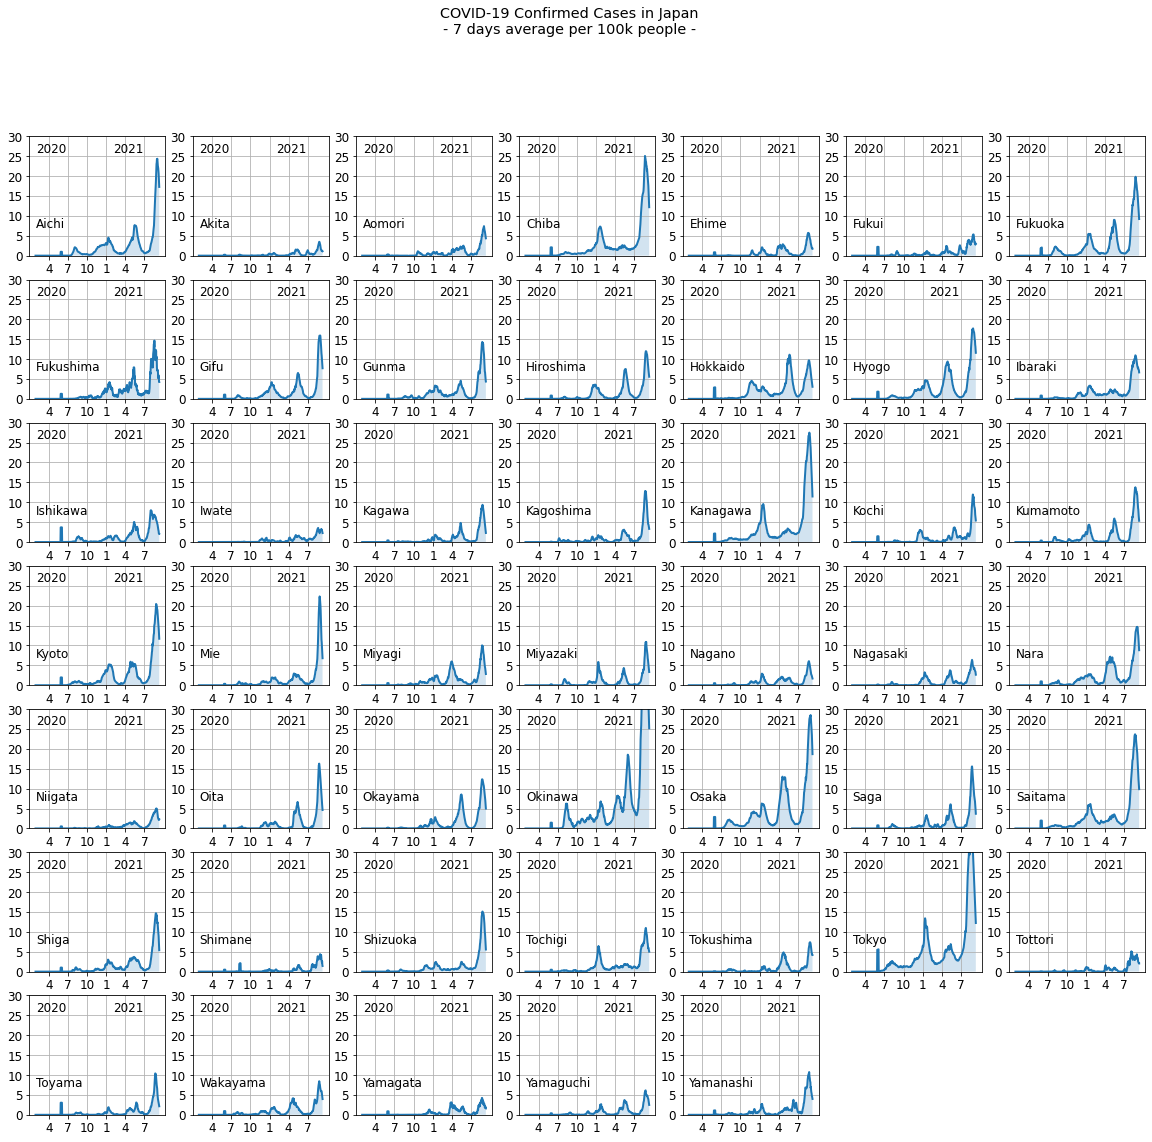

In [103]:
plt.figure(figsize=(20, 18))
plt.rcParams["font.size"]=12

for i, prefecture in enumerate(prefectures):
    population = pref_dict[prefecture]

    moving_ave = do_analysis(prefecture=prefecture, population=population)

    plt.subplot(7, 7, i+1)
    plt.fill_between(date_list[7:], 0, moving_ave, label=prefecture, alpha=0.2)
    plt.plot(date_list[7:], moving_ave, label=prefecture, lw=2)
    plt.xticks(xticks, xtick_labels)
    plt.ylim(0, 30)
    plt.yticks(np.arange(0, 30.1, 5))
    plt.grid()
    plt.text(datetime.strptime("202002", "%Y%m"), 7, prefecture)
    plt.text(datetime.strptime("202002", "%Y%m"), 26, "2020")
    plt.text(datetime.strptime("202102", "%Y%m"), 26, "2021")
    plt.suptitle("COVID-19 Confirmed Cases in Japan\n- 7 days average per 100k people -")